In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Obesity_Dataset - Obesity_Dataset .csv")

In [18]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [19]:
df.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

In [14]:
# continuous_columns = ['Age', 'Height', 'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Number_of_Main_Meals_Daily', 'Liquid_Intake_Daily', 
#                       'Physical_Excercise', 'Schedule_Dedicated_to_Technology']
# scaler = StandardScaler()
# df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
# print("Dados normalizados:")
# df.head()

In [15]:
# categorical_columns = ['Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
#                        'Calculation_of_Calorie_Intake', 'Smoking', 'Type_of_Transportation_Used']
# df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [16]:
# print("Dados após One-Hot Encoding:")
# df.head()

In [48]:
df_processed = df.drop("Class", axis=1) # Tentativa 1
#df_processed = df.drop(["Class", "Height", "Food_Intake_Between_Meals", "Smoking", "Liquid_Intake_Daily", "Schedule_Dedicated_to_Technology"], axis=1) # Tentativa 2
#df_processed = df.drop(["Class", "Height", "Food_Intake_Between_Meals", "Smoking", "Liquid_Intake_Daily", "Schedule_Dedicated_to_Technology", "Sex", "Overweight_Obese_Family"], axis=1) # Tentativa 3
# df_processed = df.drop(["Class", "Height", "Food_Intake_Between_Meals", "Smoking", "Liquid_Intake_Daily", "Schedule_Dedicated_to_Technology", "Sex", "Overweight_Obese_Family", 
#                       "Calculation_of_Calorie_Intake", "Type_of_Transportation_Used"], axis=1) # Tentativa 4
# df_processed = df.drop(["Class", "Height", "Food_Intake_Between_Meals", "Smoking", "Liquid_Intake_Daily", "Schedule_Dedicated_to_Technology", "Sex", "Overweight_Obese_Family", 
#                        "Calculation_of_Calorie_Intake", "Type_of_Transportation_Used", "Consumption_of_Fast_Food", "Physical_Excercise"], axis=1) # Tentativa 5

In [49]:
df_processed.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used'],
      dtype='object')

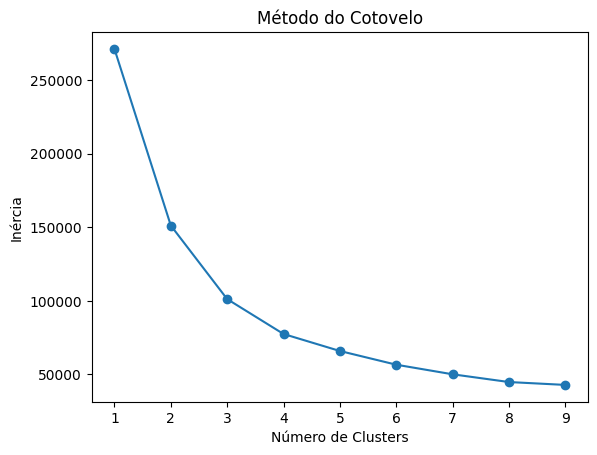

In [50]:
# Determinar o número ideal de clusters (opcional)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plotando o "cotovelo"
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

# Aplicar o modelo com o número ideal de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_processed)

# Adicionar os clusters ao dataset original
df_processed['Cluster'] = clusters

In [51]:
# Labels verdadeiros e gerados pelo modelo
true_labels = df['Class']  # Supondo que 'Class' contém os clusters corretos
predicted_labels = clusters  # Clusters gerados pelo modelo

# Calculando o ARI
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f"Ajusted Rand Index: {ari_score}")

Ajusted Rand Index: 0.13899450936163982


In [52]:
nmi_score = normalized_mutual_info_score(true_labels, predicted_labels)
print(f"Normalized Mutual Information: {nmi_score}")

Normalized Mutual Information: 0.15269082450788884
